In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist

In [2]:
# Define activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# The sigmoid() function takes an input x and returns the output after applying the sigmoid activation function to each element of x.

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# We define a function called softmax() that takes an input array x.
# Inside the function, we first compute the exponential of each element of x after subtracting the maximum value of x. This step is for numerical stability to prevent overflow.
# We then divide each element of the exponentiated array by the sum of all exponentiated elements along the specified axis (axis=1) to get the softmax probabilities.
# The keepdims=True argument ensures that the dimensions of the output match the input array's dimensions.

In [3]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Explanation
# mnist is a module within TensorFlow Keras datasets that provides access to the MNIST dataset.
# load_data() is a function provided by the mnist module. When called, it loads the MNIST dataset from the internet (if it's not already downloaded) and returns two tuples: one for training data and labels (x_train, y_train), and the other for testing data and labels (x_test, y_test).
# x_train contains the training images, represented as numpy arrays.
# y_train contains the corresponding labels (targets) for the training images.
# x_test contains the test images.
# y_test contains the corresponding labels (targets) for the test images.

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
print("Training image shape:", x_train.shape)
print("Test image shape:", x_test.shape)

Training image shape: (60000, 28, 28)
Test image shape: (10000, 28, 28)


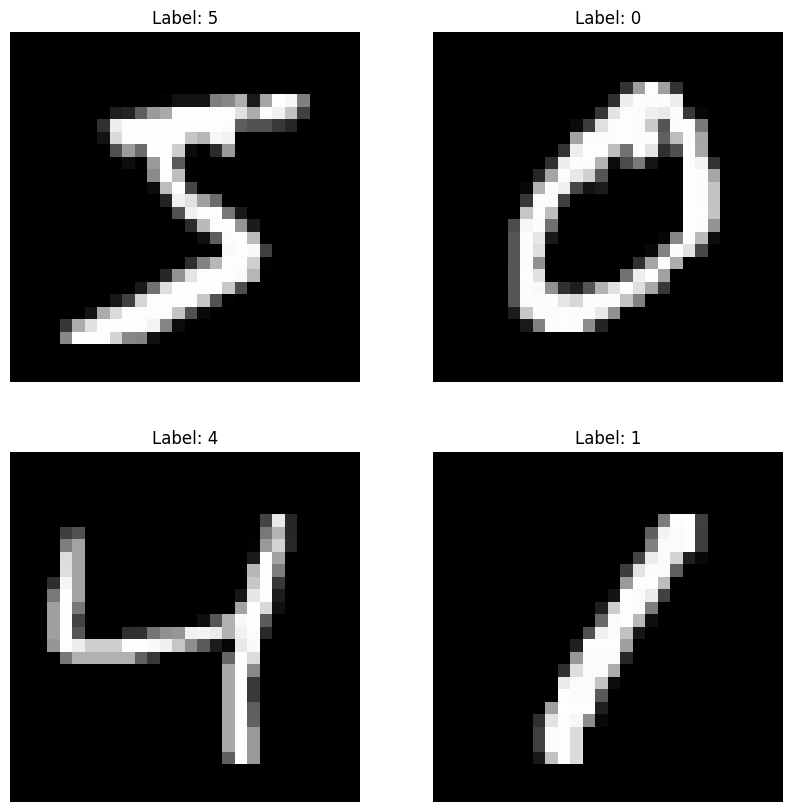

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Plot a sample of images
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.show()

# Explanation
# plt.figure(figsize=(10, 10)): This line creates a new figure with a size of 10x10 inches.
# for i in range(4):: This loop iterates over the first 4 images in the MNIST training dataset.
# plt.subplot(2, 2, i+1): This line specifies that we are creating a 2x2 grid of subplots, and we're currently working on the (i+1)th subplot.
# plt.imshow(x_train[i], cmap='gray'): This line displays the ith image from the MNIST dataset using the imshow function of matplotlib. We specify the colormap as 'gray' to display the image in grayscale.
# plt.title(f'Label: {y_train[i]}'): This line adds a title to the subplot, indicating the label of the corresponding image.
# plt.axis('off'): This line removes the axes (ticks and labels) from the subplot, making the image cleaner.
# plt.show(): This line displays the figure containing the subplots, effectively showing the sample of images.

In [6]:
# Normalize the pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# # Explanation
# x_train = x_train.astype('float32') / 255.0: This line first converts the pixel values of the training images (x_train) to floating-point numbers by using the astype('float32') method. Then, it divides each pixel value by 255.0 to scale them down to the range [0, 1]. By dividing by 255.0, which is the maximum pixel value, we ensure that the pixel values are normalized to the range [0, 1].
# x_test = x_test.astype('float32') / 255.0: Similarly, this line performs the same normalization process on the test images (x_test), ensuring consistency between the training and test data.

In [7]:
# Flatten the input images
x_train_flat = x_train.reshape((x_train.shape[0], -1))
x_test_flat = x_test.reshape((x_test.shape[0], -1))

# # Explanation
# x_train.reshape((x_train.shape[0], -1)): This line reshapes the training images (x_train) into a two-dimensional array, where the first dimension represents the number of images in the dataset (equal to x_train.shape[0]), and the second dimension is inferred using -1 to accommodate the remaining dimensions. By using -1, NumPy automatically calculates the size of the second dimension such that the total number of elements remains the same. This effectively flattens each image into a one-dimensional array, where each element corresponds to a pixel value.
# x_test.reshape((x_test.shape[0], -1)): Similarly, this line reshapes the test images (x_test) into a two-dimensional array with the same number of elements per image as the training set, effectively flattening each image in the test set.

In [8]:
# Convert labels to one-hot encoding
num_classes = 10
y_train_onehot = np.eye(num_classes)[y_train]

# Explanation
# num_classes = 10: This line defines the number of classes in the dataset. In the case of the MNIST dataset, there are 10 classes corresponding to the digits 0 through 9.
# np.eye(num_classes): This line creates an identity matrix of size num_classes x num_classes. Each row of this matrix represents a unique class, and each column corresponds to one of the classes.

In [21]:
# Hyperparameters
learning_rate = 0.1
num_epochs = 100
batch_size = 128
input_size = 784
hidden_size = 256

# Explanation
# learning_rate = 0.1: This is the learning rate parameter, which controls the step size during gradient descent optimization. It determines how much the model parameters are updated in each iteration of training. A higher learning rate may lead to faster convergence, but it can also cause instability and overshooting. Conversely, a lower learning rate may result in slower convergence but potentially more stable training.
# num_epochs = 100: This is the number of epochs, which represents the number of times the entire training dataset is passed forward and backward through the neural network during the training process. One epoch consists of one forward pass (computing predictions), followed by one backward pass (computing gradients and updating parameters). Training for more epochs allows the model to learn from the data more thoroughly, but it may also increase the risk of overfitting if the model starts memorizing the training data.
# batch_size = 128: This is the batch size parameter, which specifies the number of samples processed in one iteration. In each iteration, the model computes predictions and gradients for a batch of training samples. Using mini-batches rather than processing the entire dataset at once can lead to more efficient training, as it allows for parallel computation and reduces memory requirements. The choice of batch size can affect the convergence speed and generalization performance of the model.
# input_size = 784: This is the input size parameter, which represents the number of features (or dimensions) in each input sample. In this case, the input size corresponds to the number of pixels in the flattened input images (28x28 = 784) in the MNIST dataset.
# hidden_size = 128: This is the number of neurons in the hidden layer of the neural network. The hidden layer is an intermediate layer between the input and output layers, where the actual computations take place. The choice of hidden size can affect the model's capacity to learn complex patterns from the data. A larger hidden size allows the model to capture more complex relationships in the data but may also increase the risk of overfitting if not regularized properly.

In [22]:
# Initialize weights and biases
np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = np.random.randn(hidden_size, num_classes)
b2 = np.zeros(num_classes)
training_accuracy=[]

# Training loop
for epoch in range(num_epochs):
    # Shuffle training data
    indices = np.arange(len(x_train))
    np.random.shuffle(indices)
    x_train_shuffled = x_train_flat[indices]
    y_train_shuffled = y_train_onehot[indices]

    # Mini-batch training
    for i in range(0, len(x_train), batch_size):
        # Forward pass
        x_batch = x_train_shuffled[i:i+batch_size]
        y_batch = y_train_shuffled[i:i+batch_size]

        z1 = np.dot(x_batch, W1) + b1
        a1 = sigmoid(z1)
        z2 = np.dot(a1, W2) + b2
        a2 = softmax(z2)

        # Backpropagation
        grad_z2 = a2 - y_batch
        grad_W2 = np.dot(a1.T, grad_z2)
        grad_b2 = np.sum(grad_z2, axis=0)
        grad_a1 = np.dot(grad_z2, W2.T)
        grad_z1 = grad_a1 * (a1 * (1 - a1))
        grad_W1 = np.dot(x_batch.T, grad_z1)
        grad_b1 = np.sum(grad_z1, axis=0)

        # Update weights and biases
        W1 -= learning_rate * grad_W1
        b1 -= learning_rate * grad_b1
        W2 -= learning_rate * grad_W2
        b2 -= learning_rate * grad_b2

    # Compute training accuracy
    z1 = np.dot(x_train_flat, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = softmax(z2)
    predicted_labels = np.argmax(a2, axis=1)
    accuracy = np.mean(predicted_labels == y_train)
    training_accuracy.append(accuracy)
    print(f"Epoch {epoch+1}/{num_epochs}, Training Accuracy: {accuracy:.4f}")

Epoch 1/100, Training Accuracy: 0.9254
Epoch 2/100, Training Accuracy: 0.9404
Epoch 3/100, Training Accuracy: 0.9554
Epoch 4/100, Training Accuracy: 0.9605
Epoch 5/100, Training Accuracy: 0.9630
Epoch 6/100, Training Accuracy: 0.9666
Epoch 7/100, Training Accuracy: 0.9605
Epoch 8/100, Training Accuracy: 0.9758
Epoch 9/100, Training Accuracy: 0.9778
Epoch 10/100, Training Accuracy: 0.9781
Epoch 11/100, Training Accuracy: 0.9823
Epoch 12/100, Training Accuracy: 0.9781
Epoch 13/100, Training Accuracy: 0.9769
Epoch 14/100, Training Accuracy: 0.9834
Epoch 15/100, Training Accuracy: 0.9834
Epoch 16/100, Training Accuracy: 0.9867
Epoch 17/100, Training Accuracy: 0.9822
Epoch 18/100, Training Accuracy: 0.9879
Epoch 19/100, Training Accuracy: 0.9897
Epoch 20/100, Training Accuracy: 0.9899
Epoch 21/100, Training Accuracy: 0.9898
Epoch 22/100, Training Accuracy: 0.9909
Epoch 23/100, Training Accuracy: 0.9910
Epoch 24/100, Training Accuracy: 0.9917
Epoch 25/100, Training Accuracy: 0.9922
Epoch 26/

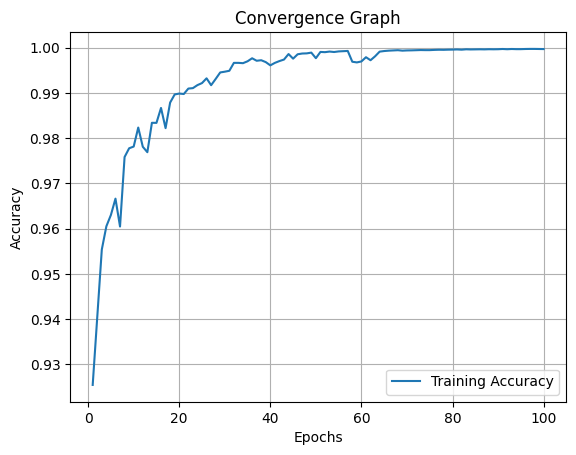

In [23]:
# Plot convergence graph
plt.plot(range(1, num_epochs + 1), training_accuracy, label='Training Accuracy')
plt.title('Convergence Graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
# Compute test accuracy
z1 = np.dot(x_test_flat, W1) + b1
a1 = sigmoid(z1)
z2 = np.dot(a1, W2) + b2
a2 = softmax(z2)
predicted_labels = np.argmax(a2, axis=1)
accuracy = np.mean(predicted_labels == y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.9653


Hidder layer = 64. Accuracy = 95.70
Hidder layer = 128. Accuracy = 0.9645
Hidder layer = 256. Accuracy = 0.9653
